In [4]:
import numpy as np 
import pandas as pd
import cv2 
from matplotlib import pyplot as plt 
from pylab import imread
from skimage.color import rgb2gray

In [5]:
def imshows(ImageData, LabelData, rows, cols, gridType = False):
  # Convert ImageData and LabelData to List
  from matplotlib import pyplot as plt
  ImageArray = list(ImageData)
  LabelArray = list(LabelData)
  if(rows == 1 & cols == 1):
    fig = plt.figure(figsize=(20,20))
  else:
    fig = plt.figure(figsize=(cols*8,rows*5))
        
  for i in range(1, cols * rows + 1):
      fig.add_subplot(rows, cols, i)
      image = ImageArray[i - 1]
      # If the channel number is less than 3, we display as grayscale image
      # otherwise, we display as color image
      if (len(image.shape) < 3):
          plt.imshow(image, plt.cm.gray)
          plt.grid(gridType)
      else:
          plt.imshow(image)
          plt.grid(gridType)
      plt.title(LabelArray[i - 1])
  plt.show()

def ShowThreeImages(IM1, IM2, IM3):
    imshows([IM1, IM2, IM3], ["Image 1","Image 2", "Image 3"], 1, 3)
def ShowTwoImages(IM1, IM2):
    imshows([IM1, IM2], ["Image 1","Image 2"], 1, 2)
def ShowOneImage(IM):
    imshows([IM], ["Image"], 1, 1)
def ShowListImages(listImage, row, col):
    listCaption = []
    for i in range(len(listImage)):
        listCaption.append(str(i))
    imshows(listImage,listCaption,row,col)

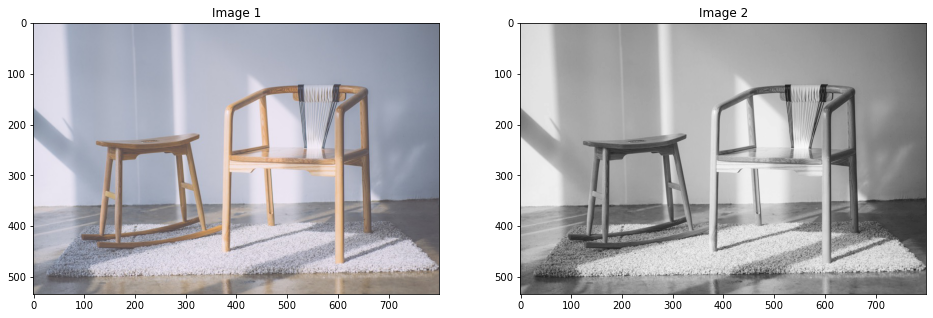

In [7]:
# Read Image 
image_color = imread("chair.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

# Display Image
ShowTwoImages(image_color, image_gray)

Filtering Kernel 3x3:


array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

Filtering Kernel 5x5:


array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

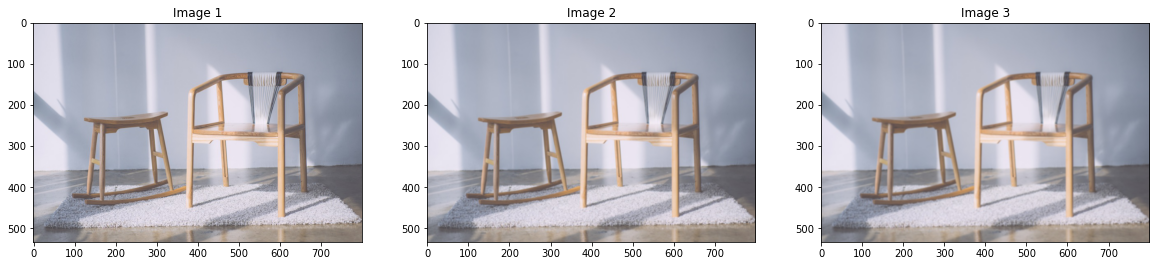

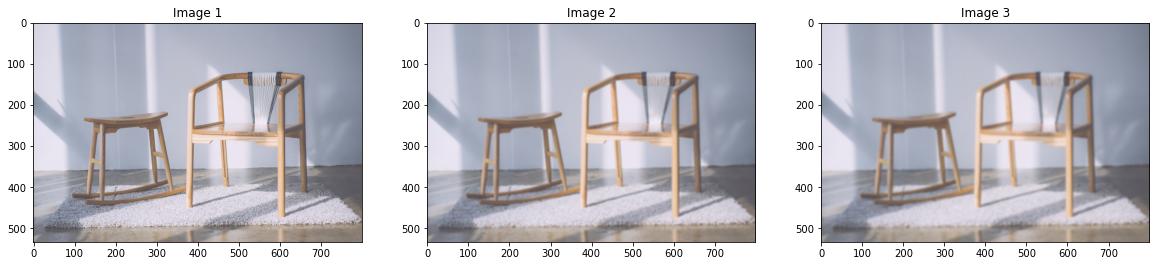

In [8]:
kernel_3_3 = np.ones((3,3),np.float32)/9
kernel_5_5 = np.ones((5,5),np.float32)/25
print("Filtering Kernel 3x3:")
display(kernel_3_3)
print("Filtering Kernel 5x5:")
display(kernel_5_5)

image_filter_3_3_01 = cv2.filter2D(image_color,-1,kernel_3_3)
image_filter_3_3_02 = cv2.filter2D(image_filter_3_3_01,-1,kernel_3_3)

image_filter_5_5_01 = cv2.filter2D(image_color,-1,kernel_5_5)
image_filter_5_5_02 = cv2.filter2D(image_filter_5_5_01,-1,kernel_5_5)

ShowThreeImages(image_color, image_filter_3_3_01, image_filter_3_3_02)
ShowThreeImages(image_color, image_filter_5_5_01, image_filter_5_5_02)

In [9]:
def variance_of_laplacian(image):
    # compute the Laplacian of the image and then return the focus
    # measure, which is simply the variance of the Laplacian
    return cv2.Laplacian(image, cv2.CV_64F).var()

In [10]:
blur_mesurement = variance_of_laplacian(image_color)
blur_mesurement_3_3_01 = variance_of_laplacian(image_filter_3_3_01)
blur_mesurement_3_3_02 = variance_of_laplacian(image_filter_3_3_02)
print("Blur Measurement of image_color:", blur_mesurement)
print("Blur Measurement of image_filter_3_3_01:", blur_mesurement_3_3_01)
print("Blur Measurement of image_filter_3_3_02:", blur_mesurement_3_3_02)

Blur Measurement of image_color: 377.37529522721206
Blur Measurement of image_filter_3_3_01: 32.399251569781605
Blur Measurement of image_filter_3_3_02: 12.514183074439956


In [11]:
blur_mesurement = variance_of_laplacian(image_color)
blur_mesurement_5_5_01 = variance_of_laplacian(image_filter_5_5_01)
blur_mesurement_5_5_02 = variance_of_laplacian(image_filter_5_5_02)
print("Blur Measurement of image_color:", blur_mesurement)
print("Blur Measurement of image_filter_5_5_01:", blur_mesurement_5_5_01)
print("Blur Measurement of image_filter_5_5_02:", blur_mesurement_5_5_02)

Blur Measurement of image_color: 377.37529522721206
Blur Measurement of image_filter_5_5_01: 10.102273516949689
Blur Measurement of image_filter_5_5_02: 3.4374724690114813


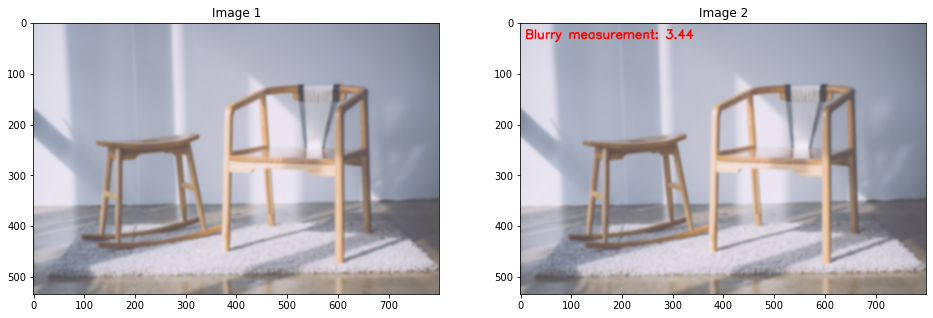

In [12]:
text = "Blurry measurement"
fm = blur_mesurement_5_5_02
image_filter_5_5_02_text = image_filter_5_5_02.copy()
cv2.putText(image_filter_5_5_02_text, "{}: {:.2f}".format(text, fm), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
ShowTwoImages(image_filter_5_5_02, image_filter_5_5_02_text)

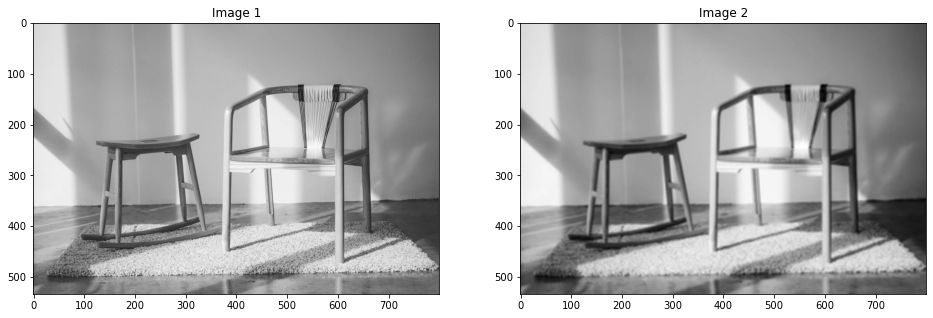

Blur Measurement of image_gray: 367.80012408942383
Blur Measurement of image_gray_filter: 9.450959496183666


In [13]:
image_gray_filter = cv2.filter2D(image_gray,-1,kernel_5_5)
ShowTwoImages(image_gray, image_gray_filter)
print("Blur Measurement of image_gray:", variance_of_laplacian(image_gray))
print("Blur Measurement of image_gray_filter:", variance_of_laplacian(image_gray_filter))

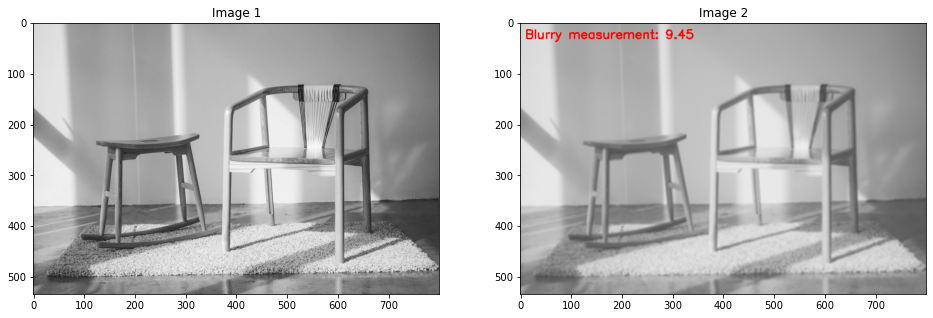

In [14]:
image_gray_filter_color = cv2.cvtColor(image_gray_filter, cv2.COLOR_GRAY2RGB)

text = "Blurry measurement"
fm = variance_of_laplacian(image_gray_filter)
cv2.putText(image_gray_filter_color, "{}: {:.2f}".format(text, fm), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
ShowTwoImages(image_gray, image_gray_filter_color)

In [15]:
def max_rgb_filter(image):
    # split the image into its BGR components
    (B, G, R) = cv2.split(image)
    # find the maximum pixel intensity values for each
    # (x, y)-coordinate,, then set all pixel values less
    # than M to zero
    M = np.maximum(np.maximum(R, G), B)
    R[R < M] = 0
    G[G < M] = 0
    B[B < M] = 0
    # merge the channels back together and return the image
    return cv2.merge([B, G, R])

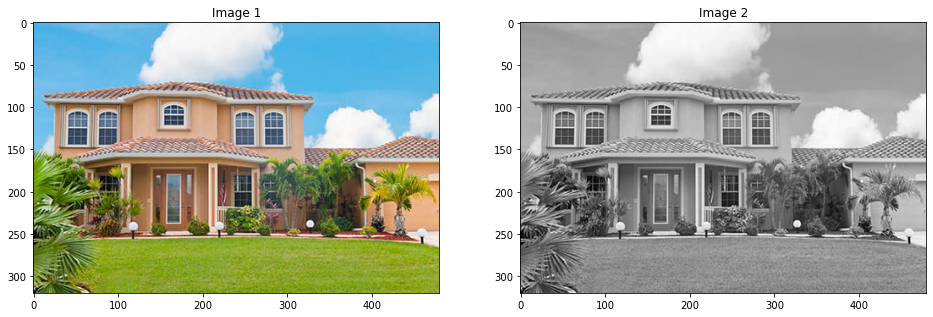

In [16]:
# Read Image 
image_color = imread("house.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

# Display Image
ShowTwoImages(image_color, image_gray)

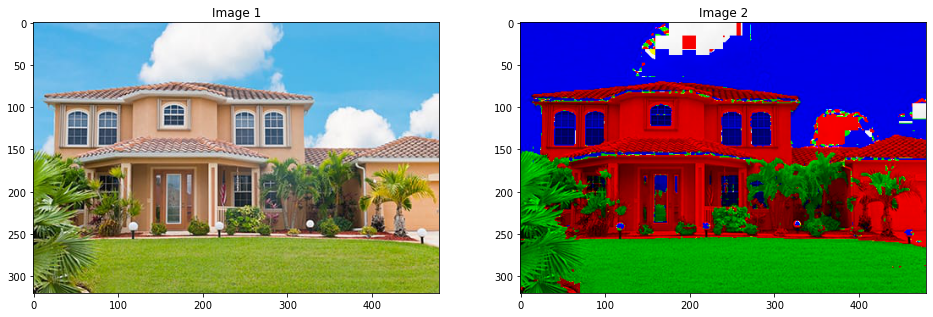

In [17]:
image_color_rgbmax = max_rgb_filter(image_color)
ShowTwoImages(image_color, image_color_rgbmax)

In [18]:
def SegmentColorImageByMask(IM, Mask):    
    Mask = Mask.astype(np.uint8)
    result = cv2.bitwise_and(IM, IM, mask = Mask)
    return result

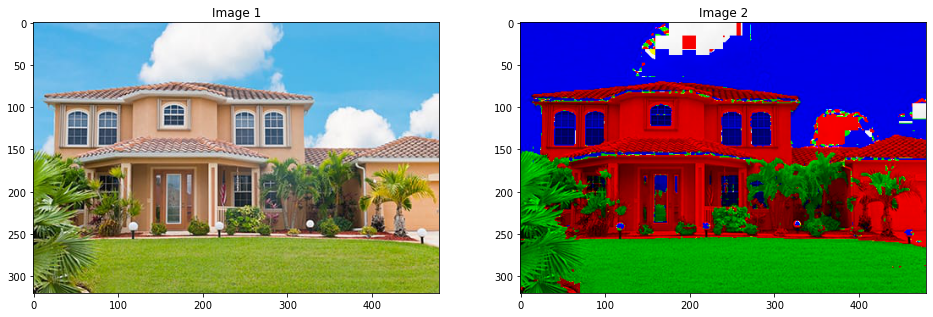

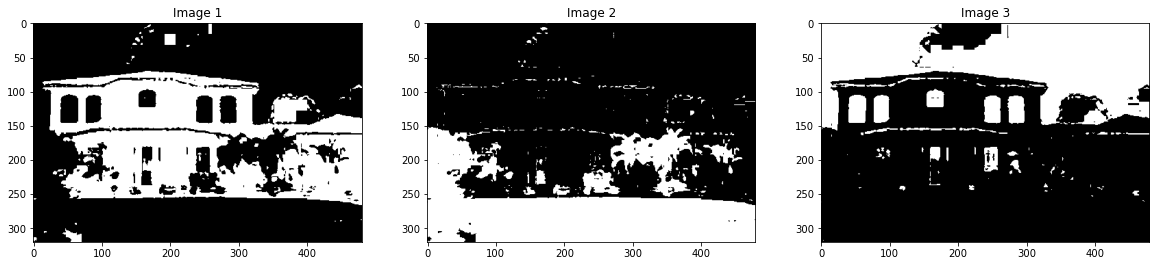

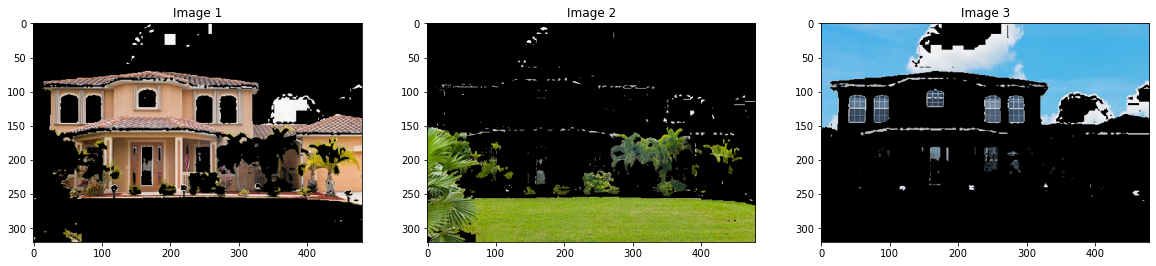

In [19]:
image_maxR_mask = image_gray < 0
image_maxG_mask = image_gray < 0
image_maxB_mask = image_gray < 0

R = image_color_rgbmax[:,:,0]
G = image_color_rgbmax[:,:,1]
B = image_color_rgbmax[:,:,2]

image_maxR_mask[(G == 0) & (B == 0)] = 1
image_maxG_mask[(R == 0) & (B == 0)] = 1
image_maxB_mask[(G == 0) & (R == 0)] = 1

image_maxR = SegmentColorImageByMask(image_color, image_maxR_mask)
image_maxG = SegmentColorImageByMask(image_color, image_maxG_mask)
image_maxB = SegmentColorImageByMask(image_color, image_maxB_mask)

ShowTwoImages(image_color, image_color_rgbmax)
ShowThreeImages(image_maxR_mask, image_maxG_mask, image_maxB_mask)
ShowThreeImages(image_maxR, image_maxG, image_maxB)

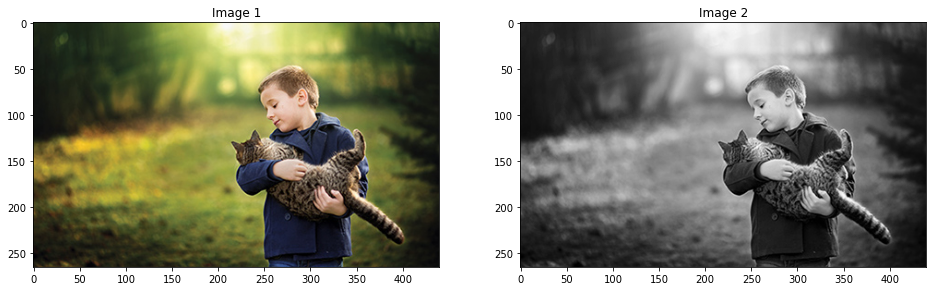

In [21]:
# Read Image 
image_color = imread("love_animal.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

# Display Image
ShowTwoImages(image_color, image_gray)

Filtering kernel_sharpen_01:


array([[-1, -1, -1],
       [-1,  9, -1],
       [-1, -1, -1]])

Filtering kernel_sharpen_02:


array([[ 0, -1,  0],
       [-1,  5, -1],
       [ 0, -1,  0]])

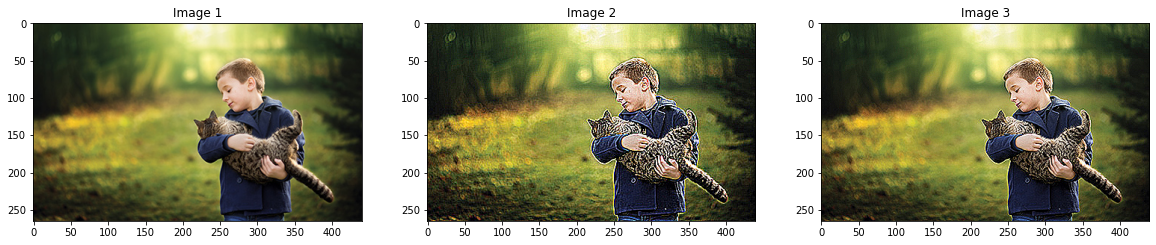

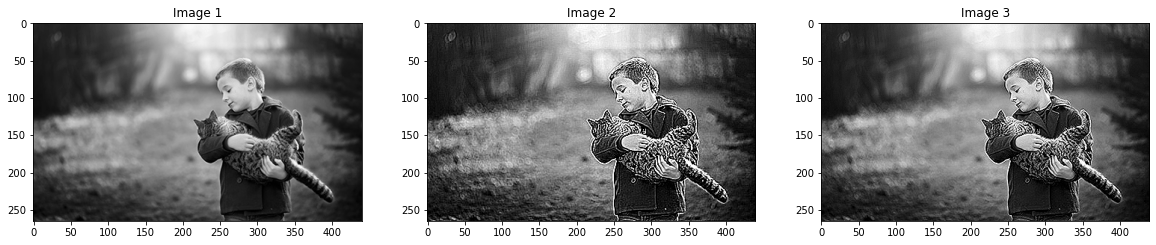

In [22]:
kernel_sharpen_01 = np.array([[-1,-1,-1], 
                              [-1, 9,-1], 
                              [-1,-1,-1]])

kernel_sharpen_02 = np.array(([0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]), dtype="int")

print("Filtering kernel_sharpen_01:")
display(kernel_sharpen_01)

print("Filtering kernel_sharpen_02:")
display(kernel_sharpen_02)

image_color_sharpen_01 = cv2.filter2D(image_color, -1, kernel_sharpen_01)
image_gray_sharpen_01 = cv2.filter2D(image_gray, -1, kernel_sharpen_01)

image_color_sharpen_02 = cv2.filter2D(image_color, -1, kernel_sharpen_02)
image_gray_sharpen_02 = cv2.filter2D(image_gray, -1, kernel_sharpen_02)

ShowThreeImages(image_color, image_color_sharpen_01, image_color_sharpen_02)
ShowThreeImages(image_gray, image_gray_sharpen_01, image_gray_sharpen_02)

In [23]:
print("Sharpen Measurement of image_color:", variance_of_laplacian(image_color))
print("Sharpen Measurement of image_color_sharpen_01:", variance_of_laplacian(image_color_sharpen_01))
print("Sharpen Measurement of image_color_sharpen_01:", variance_of_laplacian(image_color_sharpen_02))

print("Sharpen Measurement of image_gray:", variance_of_laplacian(image_gray))
print("Sharpen Measurement of image_gray_sharpen_01:", variance_of_laplacian(image_gray_sharpen_01))
print("Sharpen Measurement of image_gray_sharpen_01:", variance_of_laplacian(image_gray_sharpen_02))

Sharpen Measurement of image_color: 587.4574180909062
Sharpen Measurement of image_color_sharpen_01: 14079.831448965982
Sharpen Measurement of image_color_sharpen_01: 7699.1564137497735
Sharpen Measurement of image_gray: 574.5492793081713
Sharpen Measurement of image_gray_sharpen_01: 13316.031928452818
Sharpen Measurement of image_gray_sharpen_01: 7409.829767098597


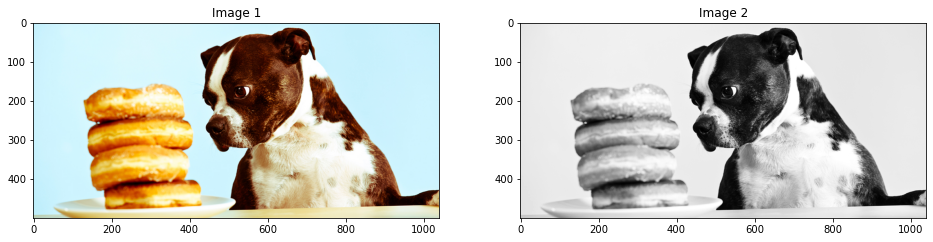

In [24]:
# Read Image 
image_color = imread("animal.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

# Display Image
ShowTwoImages(image_color, image_gray)

In [25]:
# construct the Laplacian kernel used to detect edge-like
# regions of an image
# construct the Sobel x-axis kernel
kernel_sobelX = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int")
 
# construct the Sobel y-axis kernel
kernel_sobelY = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int")

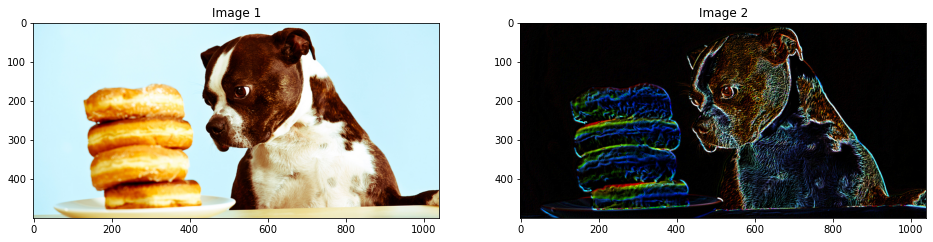

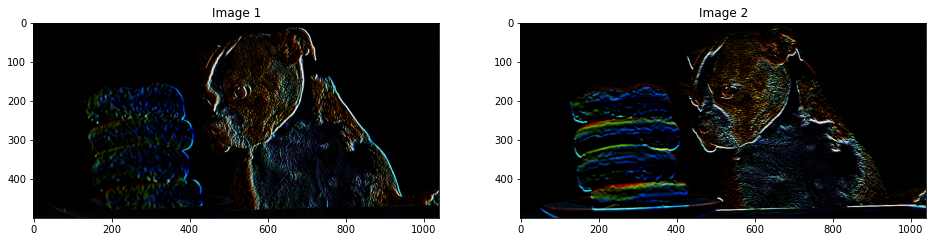

In [26]:
image_color_edge_sobelX = cv2.filter2D(image_color, -1, kernel_sobelX)
image_color_edge_sobelY = cv2.filter2D(image_color, -1, kernel_sobelY)
image_color_edge = image_color_edge_sobelX + image_color_edge_sobelY

ShowTwoImages(image_color, image_color_edge)
ShowTwoImages(image_color_edge_sobelX, image_color_edge_sobelY)

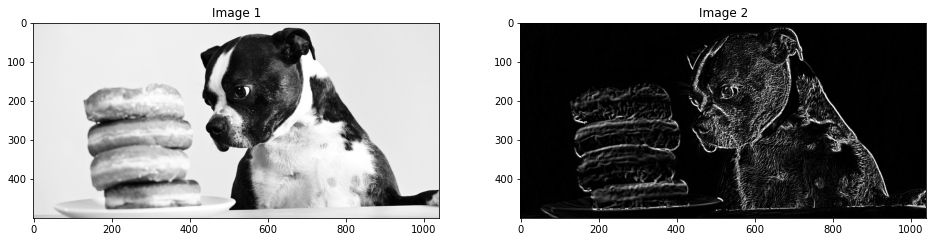

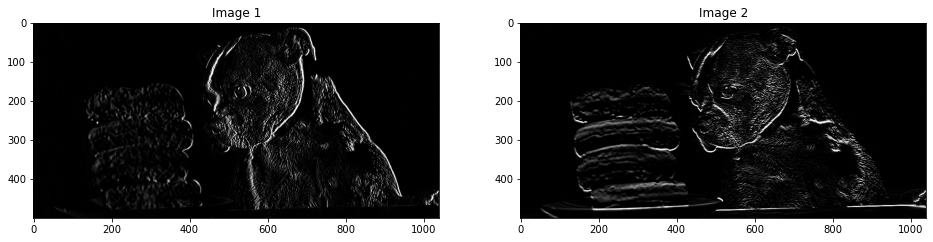

In [27]:
image_gray_edge_sobelX = cv2.filter2D(image_gray, -1, kernel_sobelX)
image_gray_edge_sobelY = cv2.filter2D(image_gray, -1, kernel_sobelY)
image_gray_edge = image_gray_edge_sobelX + image_gray_edge_sobelY

ShowTwoImages(image_gray, image_gray_edge)
ShowTwoImages(image_gray_edge_sobelX, image_gray_edge_sobelY)

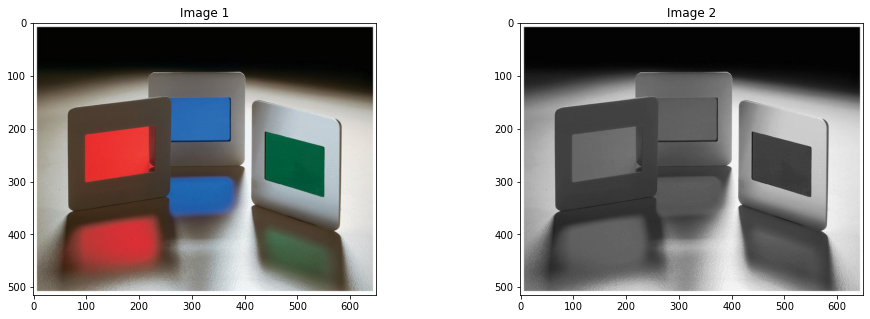

In [28]:
# Read Image 
image_color = imread("product.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

# Display Image
ShowTwoImages(image_color, image_gray)

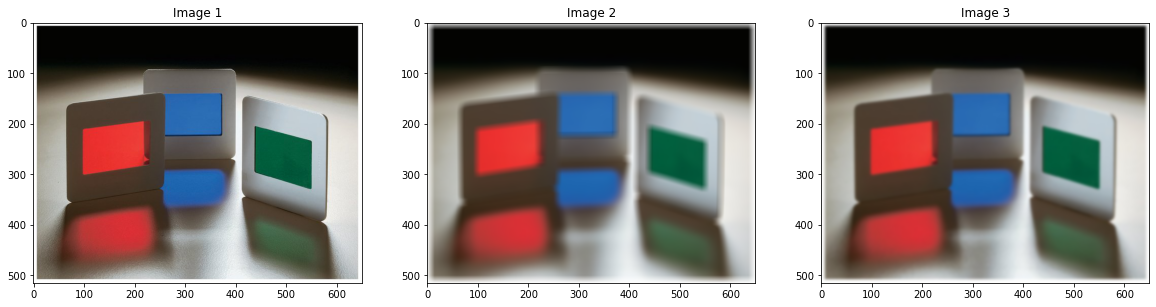

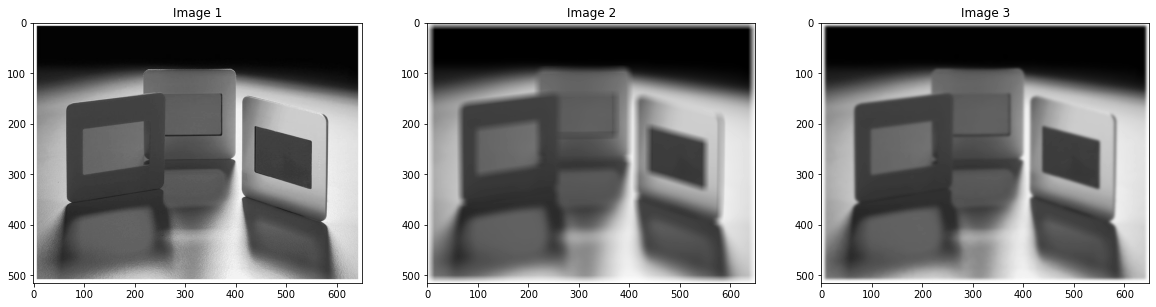

In [29]:
# Use function OpenCV 
image_color_blur_01 = cv2.blur(image_color,(15,15))
image_gray_blur_01 = cv2.blur(image_gray,(15,15))

image_color_blur_02 = cv2.GaussianBlur(image_color,(15,15),0)
image_gray_blur_02 = cv2.GaussianBlur(image_gray,(15,15),0)

ShowThreeImages(image_color, image_color_blur_01, image_color_blur_02)
ShowThreeImages(image_gray, image_gray_blur_01, image_gray_blur_02)

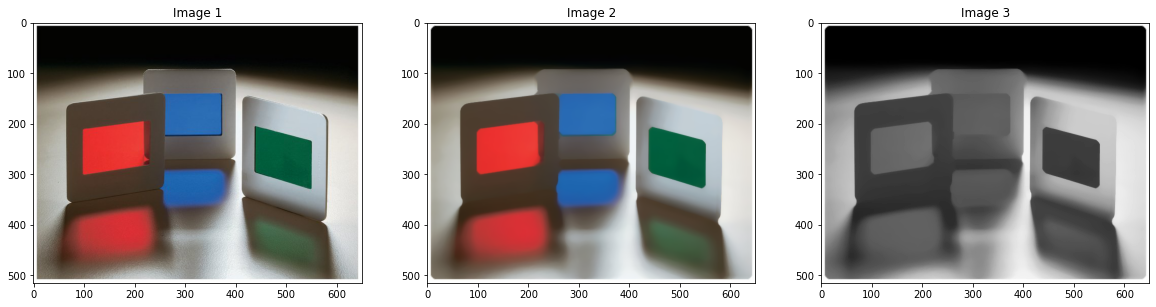

In [30]:
image_color_blur_03 = cv2.medianBlur(image_color,15)
image_gray_blur_03 = cv2.medianBlur(image_gray,15)
ShowThreeImages(image_color, image_color_blur_03, image_gray_blur_03)

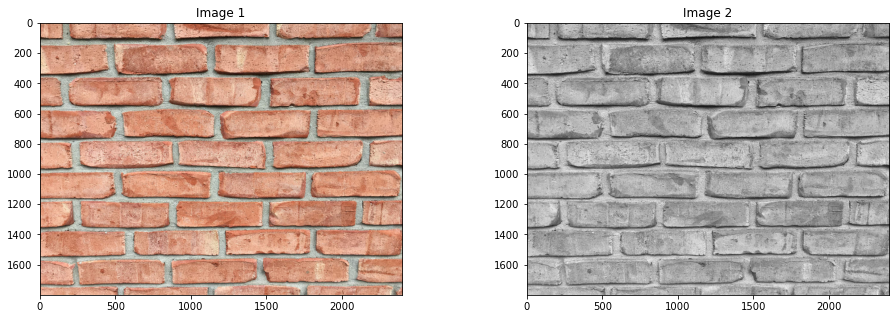

In [31]:
# Read Image 
image_color = imread("pattern.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

# Display Image
ShowTwoImages(image_color, image_gray)

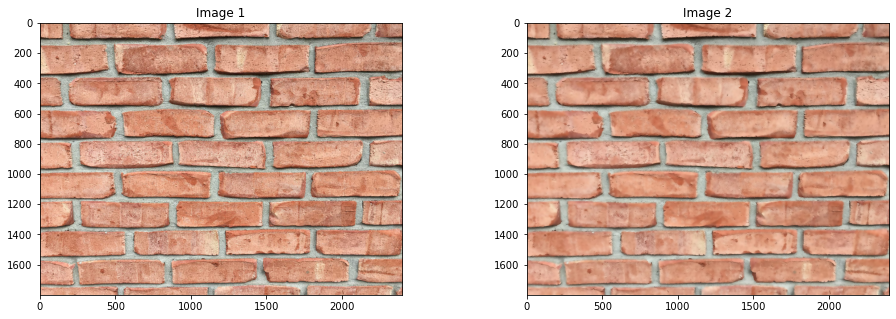

In [32]:
image_color_blur = cv2.bilateralFilter(image_color,20,100,100)
ShowTwoImages(image_color, image_color_blur)

In [33]:
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

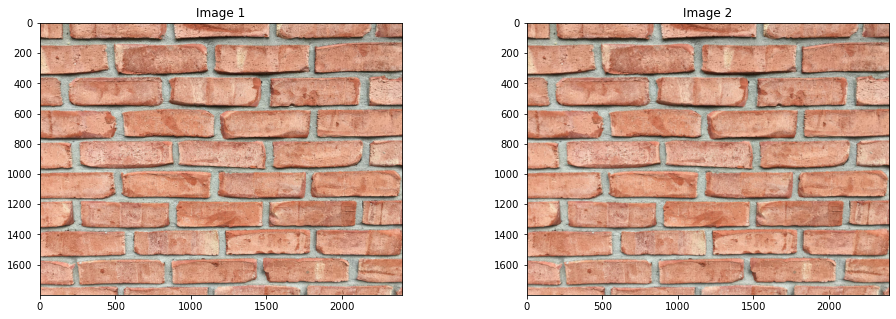

In [34]:
kernel = gaussian_kernel(15)
image_color_gaussion = cv2.filter2D(image_color, -1, kernel)
ShowTwoImages(image_color, image_color_gaussion)